<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/Naive-Bayes/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score

In [ ]:
# 1. Preparacion de datos
vote_data = pd.read_csv("house-votes-84.data", header=None, names=["NAME", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16"], na_values='?')

# Quito aquellos datos que sean null
vote_data = vote_data.dropna()

# Convertir "y" a 1 y "n" a 0
vote_data.replace({"y": 1, "n": 0}, inplace=True)

# Hacer que la columna NAME sea factor (variable categórica, con valores democrat o republican)
vote_data["NAME"] = vote_data["NAME"].astype("category")

# Observamos el formato del dataset
print(vote_data.head())
print(vote_data.tail())
print(vote_data.info())

# Veamos cuántas instancias tenemos de cada clase
print(vote_data["NAME"].value_counts(normalize=True))

          NAME  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  \
5     democrat   0   1   1   0   1   1   0   0   0    0    0    0    1    1   
8   republican   0   1   0   1   1   1   0   0   0    0    0    1    1    1   
19    democrat   1   1   1   0   0   0   1   1   1    0    1    0    0    0   
23    democrat   1   1   1   0   0   0   1   1   1    0    0    0    0    0   
25    democrat   1   0   1   0   0   0   1   1   1    1    0    0    0    0   

    V15  V16  
5     1    1  
8     0    1  
19    1    1  
23    1    1  
25    1    1  
           NAME  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  \
423    democrat   0   1   1   0   0   1   1   1   1    0    1    0    0    1   
426    democrat   1   0   1   0   0   0   1   1   1    1    0    0    0    0   
427  republican   0   0   0   1   1   1   1   1   0    1    0    1    1    1   
430  republican   0   0   1   1   1   1   0   0   1    1    0    1    1    1   
431    democrat   0   0   1   0   0

In [ ]:
# 2. Creacion de datos de entrenamiento/test
vote_raw_train, vote_raw_test = train_test_split(vote_data, test_size=65, random_state=42)

# Observamos que se mantienen las proporciones
print(vote_raw_train["NAME"].value_counts(normalize=True))
print(vote_raw_test["NAME"].value_counts(normalize=True))

democrat      0.54491
republican    0.45509
Name: NAME, dtype: float64
democrat      0.507692
republican    0.492308
Name: NAME, dtype: float64


In [ ]:
# 3. Creacion de features para el modelo
X_train = vote_raw_train.drop(columns=["NAME"])
y_train = vote_raw_train["NAME"]
X_test = vote_raw_test.drop(columns=["NAME"])
y_test = vote_raw_test["NAME"]

# Entrenar un clasificador NB
vote_classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
vote_classifier.fit(X_train, y_train)

# Predecir la clase más probable
vote_test_pred = vote_classifier.predict(X_test)

# Matriz de confusión
confusion_matrix = pd.crosstab(vote_test_pred, y_test)
print("Matriz de confusion: ",confusion_matrix)

# Predicciones donde se ha equivocado el modelo
misclassifications = vote_raw_test[vote_test_pred != y_test]
print(misclassifications)

# Predecir con probabilidades
vote_test_pred_probs = vote_classifier.predict_proba(X_test)
pred_probs_df = pd.DataFrame(vote_test_pred_probs, columns=vote_classifier.classes_)
print(pred_probs_df.head())

Matriz de confusion:  NAME        democrat  republican
row_0                           
democrat          30           1
republican         3          31
           NAME  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  \
267  republican   1   0   0   0   0   0   1   1   1    1    0    0    0    1   
162    democrat   0   1   1   0   1   1   1   0   0    0    1    1    1    1   
78     democrat   1   1   1   0   1   1   0   0   0    1    1    0    1    1   
375    democrat   0   1   0   1   1   1   0   0   0    0    1    1    0    1   

     V15  V16  
267    0    1  
162    0    1  
78     0    1  
375    0    0  
   democrat  republican
0  0.999348    0.000652
1  0.990210    0.009790
2  0.000235    0.999765
3  0.000769    0.999231
4  0.000209    0.999791


Área bajo la curva ROC (AUC) con el cálculo 0.9829545454545455


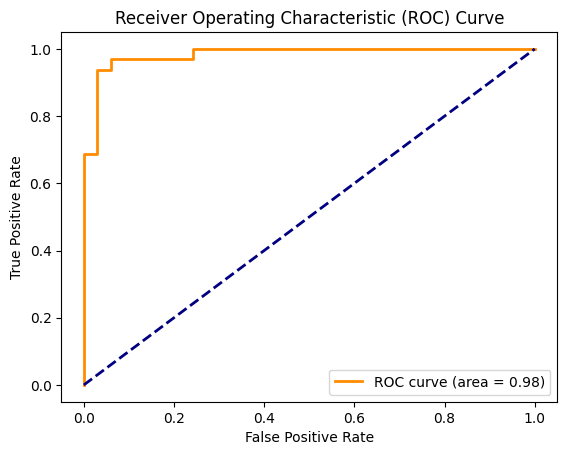

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, vote_test_pred_probs[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print("Área bajo la curva ROC (AUC) con el cálculo",roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

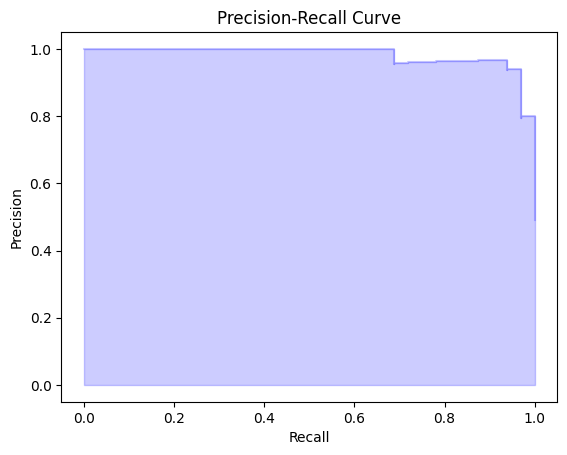

In [ ]:

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, vote_test_pred_probs[:, 1], pos_label="republican")

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

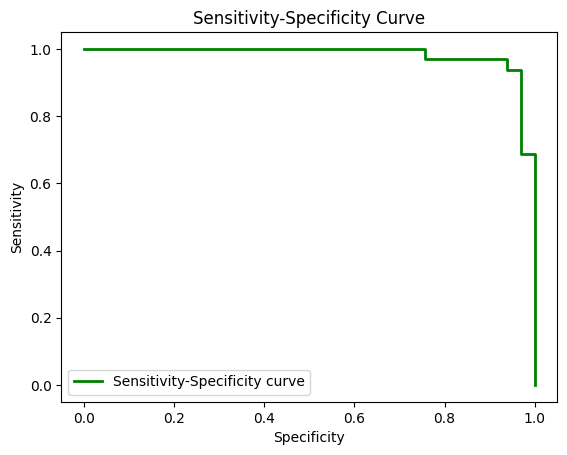

In [ ]:
# Curva sensibilidad-especificidad
sens = tpr
spec = 1 - fpr

plt.figure()
plt.plot(spec, sens, color='green', lw=2, label='Sensitivity-Specificity curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Sensitivity-Specificity Curve')
plt.legend(loc="lower left")
plt.show()
